In [1]:
from pyoculus.problems import CylindricalBfield, AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pickle

In [91]:
# separatrix = {"type": "circular-current-loop", "amplitude": -4.2, "R": 3, "Z": -2.2}
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
# separatrix = {"type": "circular-current-loop", "amplitude": -4, "R": 3, "Z": -2.2}
maxwellboltzmann = {"m": 3, "n": -2, "d": 1.4, "type": "maxwell-boltzmann", "amplitude": 1e-3}
gaussian10 = {"m": 1, "n": 0, "d": 1, "type": "gaussian", "amplitude": 0.1}

ps = AnalyticCylindricalBfield.without_axis(6, 0, 0.91, 0.6, perturbations_args = [separatrix, maxwellboltzmann], Rbegin = 2, Rend = 8, niter = 800, guess=[6.4,-0.7],  tol = 1e-9)
# ps = AnalyticCylindricalBfield(3, 0, 0.9, 0.7, perturbations_args = [separatrix])

0 - dr : 0.022875984536308642
1 - RZ : [ 6.41393045 -0.69351418]
1 - dr : 0.00015105378776343159
2 - RZ : [ 6.4140417  -0.69355812]
2 - dr : 1.2910162594138937e-08
3 - RZ : [ 6.41404171 -0.69355813]
3 - dr : 2.3603665272841412e-15


### Poincare

In [78]:
results = [[6.17305596, 0, -4.6485854]]

In [177]:
# set up the integrator for the Poincare
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 25
pparams["nPpts"] = 150
pparams["zeta"] = 0

# # Set RZs for the normal (R-only) computation
pparams["Rbegin"] = 6.3
pparams["Rend"] = 9.1

# Set RZs for the tweaked (R-Z) computation
# nfieldlines = pparams["nPtrj"] + 1

# Directly setting the RZs
# Rs = np.linspace(3.2, 3.15, nfieldlines)
# Zs = np.linspace(-0.43, -2.5, nfieldlines)
# RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

# Two interval computation opoint to xpoint then xpoint to coilpoint
# n1, n2 = int(np.ceil(nfieldlines / 2)), int(np.floor(nfieldlines / 2))
# xpoint = np.array([results[0][0], results[0][2]])
# opoint = np.array([ps._R0, ps._Z0])
# coilpoint = np.array(
#     [ps.perturbations_args[0]["R"], ps.perturbations_args[0]["Z"]]
# )

# Simple way from opoint to xpoint then to coilpoint
# Rs = np.concatenate((np.linspace(opoint[0]+1e-4, xpoint[0], n1), np.linspace(xpoint[0], coilpoint[0]-1e-4, n2)))
# Zs = np.concatenate((np.linspace(opoint[1]+1e-4, xpoint[1], n1), np.linspace(xpoint[1], coilpoint[1]-1e-4, n2)))
# RZs = np.array([[r, z] for r, z in zip(Rs, Zs)])

# Sophisticated way more around the xpoint
# deps = 0.05
# RZ1 = xpoint + deps * (1 - np.linspace(0, 1, n1)).reshape((n1, 1)) @ (
#     opoint - xpoint
# ).reshape((1, 2))
# RZ2 = xpoint + deps * np.linspace(0, 1, n2).reshape((n2, 1)) @ (
#     coilpoint - xpoint
# ).reshape((1, 2))
# RZs = np.concatenate((RZ1, RZ2))

# Set up the Poincare plot object
pplot = PoincarePlot(ps, pparams, integrator_params=iparams)

In [178]:
# # R-only computation
pplot.compute()

# R-Z computation
# pplot.compute(RZs)

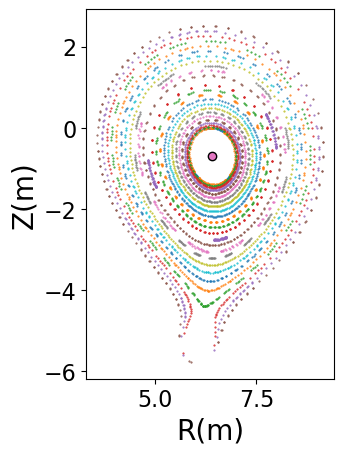

In [179]:
fig_perturbed, ax_perturbed = pplot.plot(marker=".", s=1)

ax_perturbed.scatter(ps._R0, ps._Z0, marker="o", edgecolors="black", linewidths=1)
plt.show()

In [182]:
pplot.compute_iota()

array([0.66857748, 0.67178039, 0.66325297, 0.65079631, 0.63194556,
       0.60793956, 0.58005995, 0.54957213, 0.51776412, 0.48465303,
       0.45267844, 0.42134225, 0.39216614, 0.36350441, 0.33504262,
       0.31244658, 0.28740726, 0.26800618, 0.24814045, 0.22916869,
       0.2110303 , 0.19224839, 0.15795068, 0.16176202, 0.16634771,
       0.16565244])

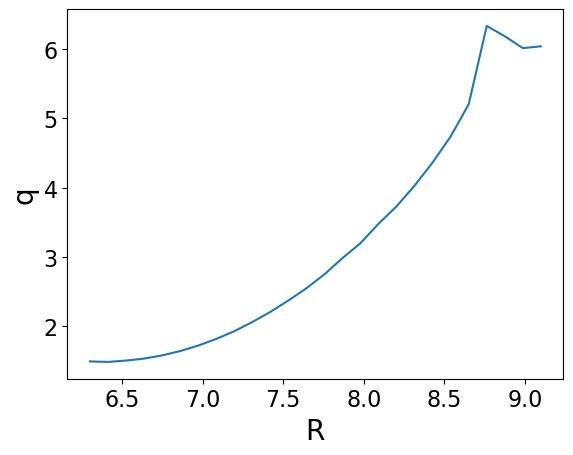

In [183]:
pplot.plot_q()

In [104]:
date = datetime.datetime.now().strftime("%m%d%H%M")
dumpname = f"../output/toybox_tok_{date}.pkl"
with open(dumpname, "wb") as f:
    pickle.dump(fig_perturbed, f)

### Finding fixed points

In [95]:
# set up the integrator
iparams = dict()
iparams["rtol"] = 1e-7

pparams = dict()
pparams["nrestart"] = 0
pparams['niter'] = 600

fp_perturbed = FixedPoint(ps, pparams, integrator_params=iparams)

# fp_perturbed.compute(guess=[fp.x[0], fp.z[0]], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[3.117263523069049, -1.6173346133145015], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[3.1072023810385443, -1.655410284892828], pp=0, qq=1, sbegin=0.1, send=6, tol = 4e-12)
# fp_perturbed.compute(guess=[3.117264916246293, -1.617334822348791], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[4.624454, 0.], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
# fp_perturbed.compute(guess=[4.43582958 -1.22440153], pp=0, qq=1, sbegin=0.1, send=6, tol = 1e-10)
fp_perturbed.compute(guess=[6.2, -4.45], pp=0, qq=1, sbegin=1, send=8, tol = 1e-10)

0 - [DeltaR, DeltaZ] : [0.32629057 0.22964749] - dtheta : 0.08873506597581948
0 - [StepR, StepZ]: [-0.00550898 -0.04162471]
1 - RZ : [ 6.19449102 -4.49162471] - rhotheta : [ 3.80440695 -1.62853798]
1 - [DeltaR, DeltaZ] : [-0.12965106 -0.13678843] - dtheta : 0.03077223464526324
1 - [StepR, StepZ]: [0.00563426 0.00065922]
2 - RZ : [ 6.20012528 -4.49096549] - rhotheta : [ 3.80342778 -1.62706908]
2 - [DeltaR, DeltaZ] : [-0.01114712 -0.01810437] - dtheta : 0.002645436360588338
2 - [StepR, StepZ]: [ 0.00358332 -0.00487906]
3 - RZ : [ 6.20370861 -4.49584455] - rhotheta : [ 3.80809953 -1.62605754]
3 - [DeltaR, DeltaZ] : [1.29754155e-04 4.67729963e-05] - dtheta : 3.3343270370300715e-05
3 - [StepR, StepZ]: [ 2.39713462e-05 -5.17974563e-05]
4 - RZ : [ 6.20373258 -4.49589635] - rhotheta : [ 3.80814993 -1.6260505 ]
4 - [DeltaR, DeltaZ] : [-4.50688464e-09 -6.76245904e-09] - dtheta : 1.0758680613065508e-09
4 - [StepR, StepZ]: [ 1.24280231e-09 -1.64114233e-09]
5 - RZ : [ 6.20373258 -4.49589635] - rhot

In [ ]:
hist = np.array(fp_perturbed.history)
plt.plot(hist[:, 0], hist[:, 1])

In [99]:
results = [list(p) for p in zip(fp_perturbed.x, fp_perturbed.y, fp_perturbed.z)]

In [100]:
results

[[6.203732580655979, 0.0, -4.495896347701468],
 [6.203732580655975, 0.0, -4.495896347701471]]

In [ ]:
fp_perturbed.x, fp_perturbed.y, fp_perturbed.z

In [ ]:
# ax_perturbed.scatter(fp_perturbed.x[0], fp_perturbed.z[0], marker="X", edgecolors="black", linewidths=1)
# fig_perturbed

### Back on manifold

In [136]:
fp_perturbed.jacobian

array([[18.83222751, 10.75778052],
       [17.05952686,  9.79823792]])

In [184]:
iparams = dict()
iparams["rtol"] = 1e-12

manifold = Manifold(fp_perturbed, ps, integrator_params=iparams)

manifold.compute(nintersect = 10, neps = 300, epsilon=1e-6, directions="u+")
manifold.compute(nintersect = 10, neps = 300, epsilon=1e-6, directions="u-")
manifold.compute(nintersect = 10, neps = 100, epsilon=1e-6, directions="s+")
manifold.compute(nintersect = 5, neps = 100, epsilon=1e-6, directions="s-")

Computing unstable manifold with postive epsilon...
Computing unstable manifold with negative epsilon...
Computing stable manifold with positive epsilon...
Computing stable manifold with negative epsilon...


In [141]:
ax_perturbed.scatter(fp_perturbed.x[0], fp_perturbed.z[0], marker="X", edgecolors="black", linewidths=1)

In [105]:
# dumpname = "../output/toybox_tok_04151041.pkl"
dumpname = "../../runs/toybox-tok-shear-150424/perturbed/poincare.pkl"

# fig_perturbed = pickle.load(open("../output/toybox_.pkl", "rb"))
fig_perturbed = pickle.load(open(dumpname, "rb"))
ax_perturbed = fig_perturbed.get_axes()[0]

for col in ax_perturbed.collections:
    col.set_color('black')
    col.set_sizes([0.5])

plt.show()

In [134]:
ax_perturbed.set_xlim(3, 9)
ax_perturbed.set_ylim(-6, 2.3)

(-6.0, 2.3)

In [143]:
ax_perturbed.set_xlim(6., 6.4)
ax_perturbed.set_ylim(-4.6, -4.4)

(-4.6, -4.4)

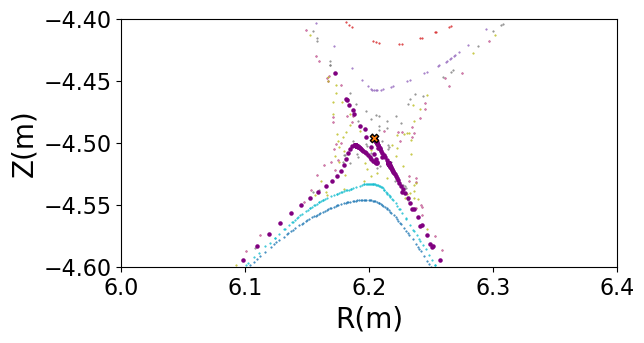

In [144]:
fig_perturbed

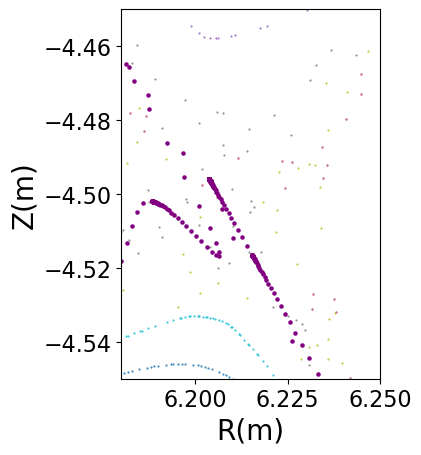

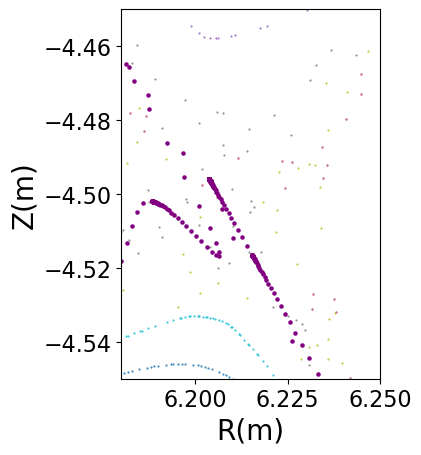

In [140]:
fig_perturbed, ax_perturbed = pplot.plot(marker=".", s=1)

ax_perturbed.set_xlim(6.18, 6.25)
ax_perturbed.set_ylim(-4.55, -4.45)

manifold.plot(ax_perturbed, directions="s-")
fig_perturbed

In [ ]:
# general view
ax_perturbed.set_xlim(2.3, 4)
ax_perturbed.set_ylim(-1.9,1)

In [ ]:
# plan americain
ax_perturbed.set_xlim(3, 3.2)
ax_perturbed.set_ylim(-1.7, -1.6)

In [ ]:
# close up view
ax_perturbed.set_xlim(3.08, 3.13)
ax_perturbed.set_ylim(-1.67, -1.63)

In [ ]:
fig_perturbed